# Data Mining Assignment

## Group 13 Members :
```
| Roll No.    | Name            |
| ----------- | --------------- |
| 2021MT12014 | Ujjwal Kalra    |
| 2021MT12054 | Akhil S         |
| 2021MT12084 | Shruti P Katare |
| 2021MT12164 | Surbhi Mahajan  |																		
```

For this assignment, we have selected [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
). This dataset is used to predict the likelyhood of getting a stroke based on attributes such as gender, age, smoking habbits etc.

Please make sure all the necessary py files exists in the same folder this notebook is in. the `README.txt` file has the list of all algorithm implementation python files. 

## Import relevant libraries

In [1]:
import numpy as np                                # To store data
import pandas as pd                               # To store data
import seaborn as sns                             # For plotting
import matplotlib.pyplot as plt                   # For plotting
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore') 

## Insights on data
### Dataframe Shape

In [2]:
data=pd.read_csv('./healthcare-dataset-stroke-data.csv')
df = data.copy()
df.shape

(5110, 12)

### Initial rows of dataframe

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Feature Information:

- **id**: Unique Identification number of each patient.
- **gender**: Gender of the individual whether "Male", "Female" or "Other"
- **age**: Age of the patient
- **hypertension**: Health related parameter, does person have hypertension.
- **heart_disease**: Health related parameter, does person have heart disease.
- **ever_married**: Personal information, is person married on not?
- **work_type**: Nature of work place: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- **Residence_type**: Residence type of the individual.
- **avg_glucose_level**: average glucose level in blood for the individual.
- **bmi**: body mass index of the individual.
- **smoking_status**: Habitual information. Current smoking status of individual.
- **stroke**: Our taget, is person suffered heart attack?

### Dataframe summary and observation
#### Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Observations
- There are 5110 rows.
- Dataset has both numerical and categorical attributes.
- 'Stroke' attribute is coded as 1 for positive and 0 for negative cases.
- Both 'Hypertension' and 'heart disease" are coded as 1 for the positive cases and 0 for the negative cases.
- We have 3 other categorical variables, which are not encoded.

# Data Preprocessing and Data Visualization 

## Drop 'id' column as it is irrelevant to target variable

In [5]:
df = df.drop(['id'],axis =1)

## Checking for duplicate records

In [6]:
df.duplicated().sum()

0

### Checking for null values in dataset

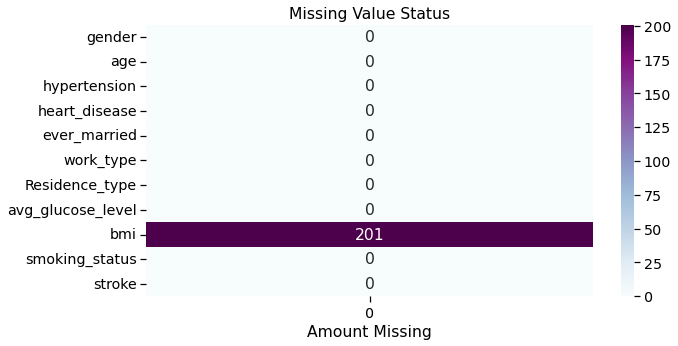

In [7]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.3)
plt.title('Missing Value Status')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='BuPu')
ax.set_xlabel('Amount Missing')
plt.show()

**We have 201 missing values for the 'bmi' attribute.**

### Imputing missing BMI values with mean value

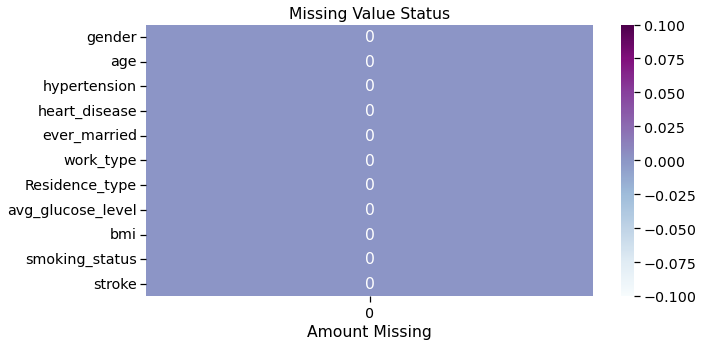

In [8]:
df['bmi'] = df['bmi'].fillna(round (df['bmi'].mean(), 2))
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.3)
plt.title('Missing Value Status')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='BuPu')
ax.set_xlabel('Amount Missing')
plt.show()

## Target column distribution

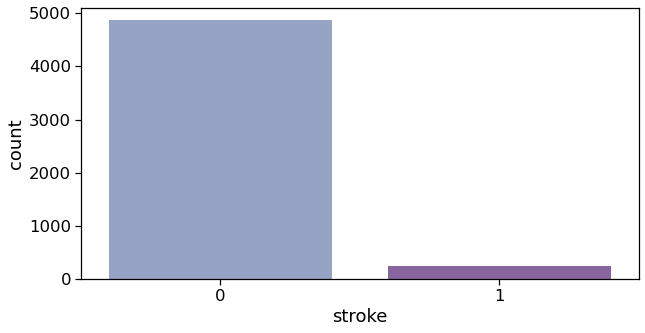

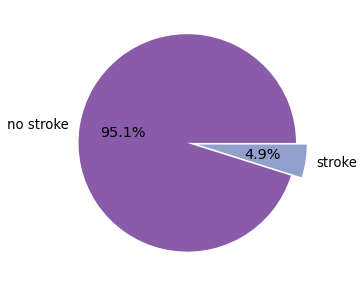

In [9]:
Target = 'stroke'
df['stroke'].value_counts()
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['stroke'], palette=["#909fcb", "#8a5ba9"])
plt.show()
df_stroke= pd.DataFrame(df.groupby('stroke')['stroke'].count())
colors = ["#8a5ba9", "#909fcb"]
explode = [0,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie(df_stroke['stroke'],labels=['no stroke','stroke'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.show()

- 95.1% of the instances of our target variable is 'No stroke'
- 4.9% of the instances of our target variable is 'Stroke'
**Hence, the given dataset is imbalanced**

## Seggregating attributes to categorical and numerical

### Categorical attributes, their statistics, and Univariate Analysis

In [10]:
round (df.describe(exclude = ['float']),2)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110.0,5110.00,5110,5110,5110,5110,5110.00
unique,3,NaN,NaN,2,5,2,4,NaN
top,Female,NaN,NaN,Yes,Private,Urban,never smoked,NaN
freq,2994,NaN,NaN,3353,2925,2596,1892,NaN
mean,NaN,0.1,0.05,NaN,NaN,NaN,NaN,0.05
std,NaN,0.3,0.23,NaN,NaN,NaN,NaN,0.22
min,NaN,0.0,0.00,NaN,NaN,NaN,NaN,0.00
25%,NaN,0.0,0.00,NaN,NaN,NaN,NaN,0.00
50%,NaN,0.0,0.00,NaN,NaN,NaN,NaN,0.00
75%,NaN,0.0,0.00,NaN,NaN,NaN,NaN,0.00


In [11]:
category_list = ["gender","hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"]
df_cat = df.loc[:, category_list]

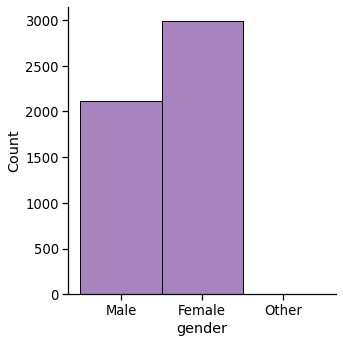

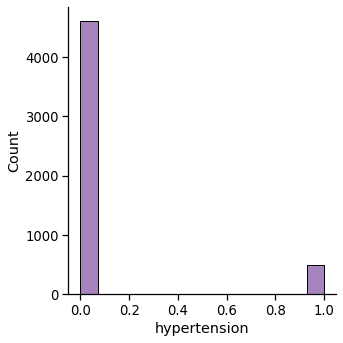

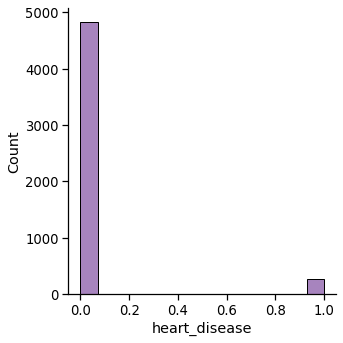

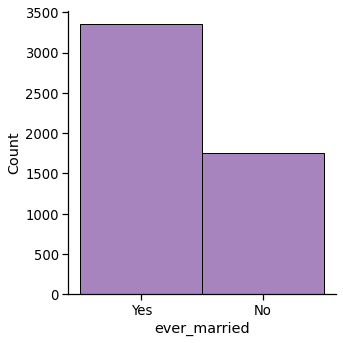

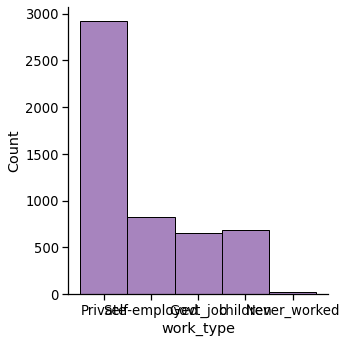

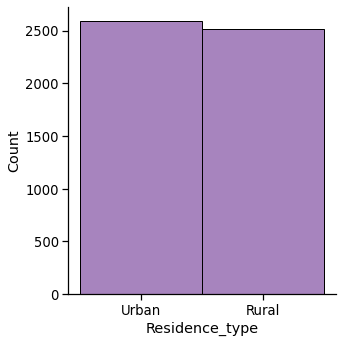

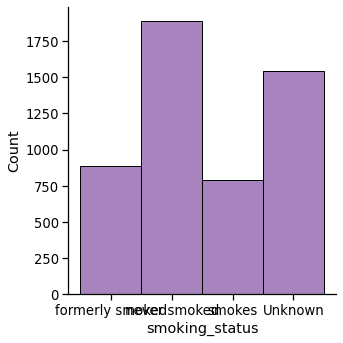

In [12]:
for i, column in enumerate(df_cat.columns):
    if(column =="stroke"):
        continue
    sns.displot(df_cat[column], color='#8a5ba9')

#### Observations
- We observe that no. of female patients is higher than that of male patients.
- We observe that more married individuals patient count.
- Least number of patients for those who are never employed and highest in case of private company employees.

### Bivariate analysis of categorical attributes v/s target variable

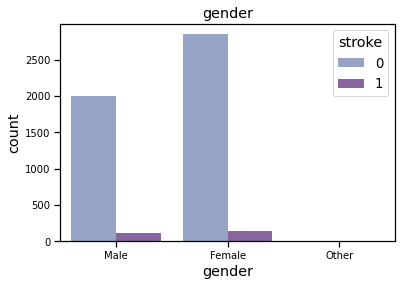

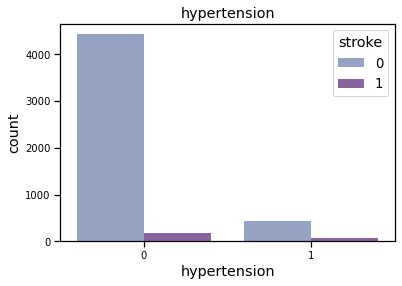

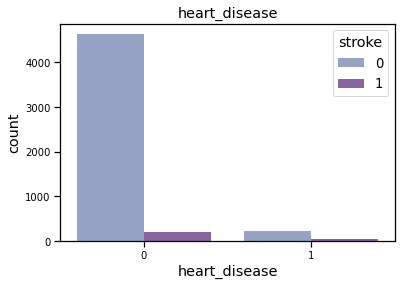

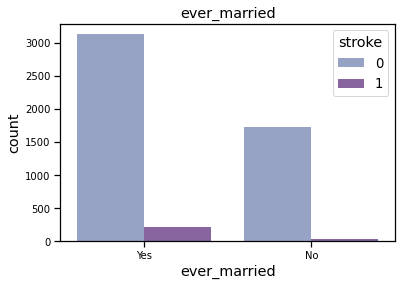

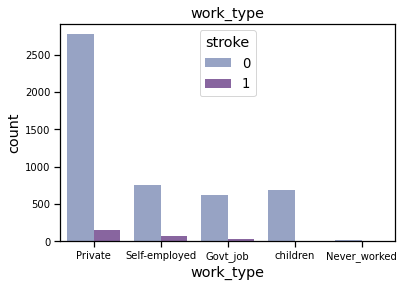

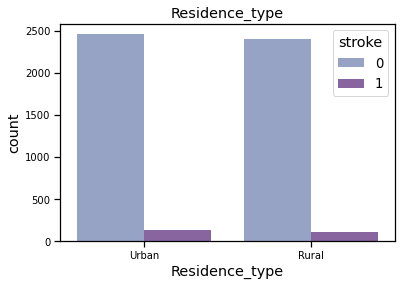

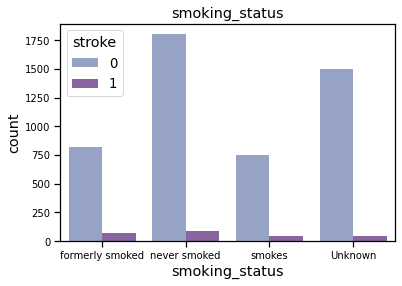

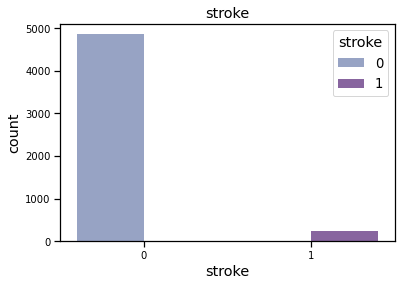

In [13]:
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
for i in category_list:
    plt.figure()
    sns.countplot(x = i, data = df_cat, hue = "stroke", palette=["#909fcb", "#8a5ba9"])
    plt.title(i)

### Label Encoding Categorical Attributes
Label Encoding converts each category of a categorical attribute into numbers.

In [14]:
le = LabelEncoder()
for col in category_list:
    df[col] = le.fit_transform(df[col])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00,2,1


## Numerical attributes, their statistics, and Univariate Analysis

In [15]:
df_copy=df.copy()
round (df_copy.describe(exclude = ['object', 'int64']), 2)

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,5110.00,5110.00,5110.00,5110.00,5110.00,5110.00,5110.00,5110.00
mean,0.41,43.23,0.66,2.17,0.51,106.15,28.89,1.38
std,0.49,22.61,0.48,1.09,0.50,45.28,7.70,1.07
min,0.00,0.08,0.00,0.00,0.00,55.12,10.30,0.00
25%,0.00,25.00,0.00,2.00,0.00,77.24,23.80,0.00
50%,0.00,45.00,1.00,2.00,1.00,91.88,28.40,2.00
75%,1.00,61.00,1.00,3.00,1.00,114.09,32.80,2.00
max,2.00,82.00,1.00,4.00,1.00,271.74,97.60,3.00


In [16]:
numerical_list = ["age", "avg_glucose_level", "bmi", "stroke"]
df_num = df.loc[:, numerical_list]

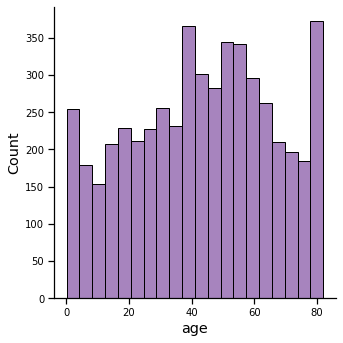

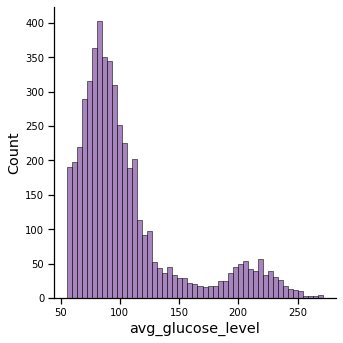

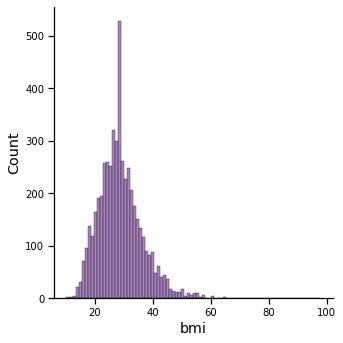

In [17]:
n_rows=1
n_cols = 3
for i, column in enumerate(df_num.columns):
    if(column =="stroke"):
        continue
    sns.displot(df_num[column], color='#8a5ba9')

#### Observations
- There are large no. of patients with age above 40.
- The average glucose level graph shows more patients with less avg_glucose_levelis left-skewed. There are sufficient no. of patients with high glucose level.
- We see a large number of patients with high bmi.

### Bivariate analysis of Numerical attributes v/s Target variable

Text(0.5, 0, 'BMI')

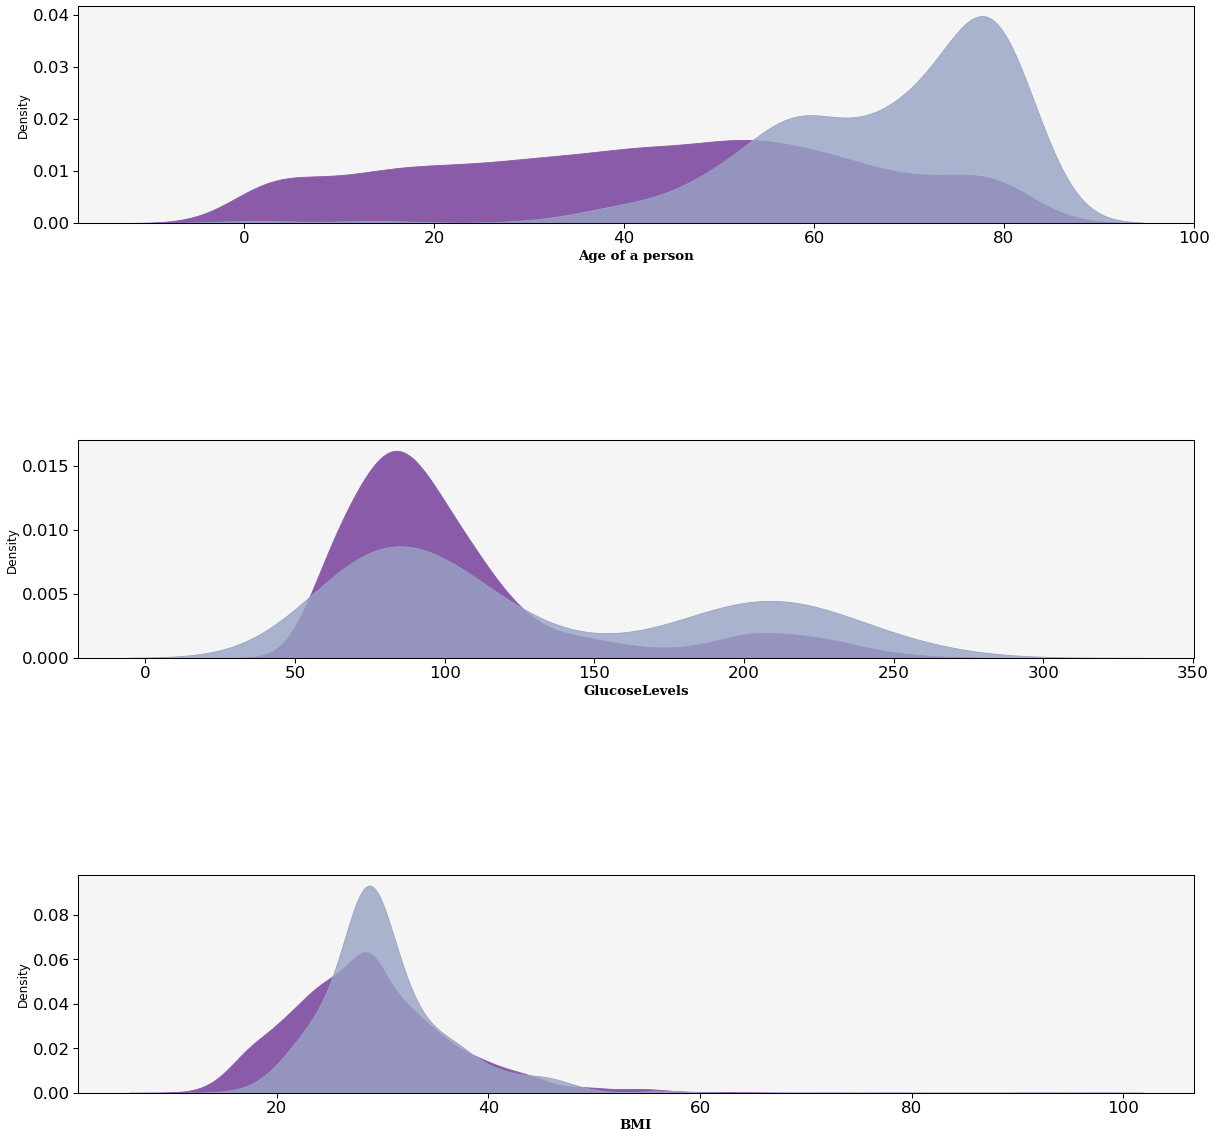

In [18]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig = plt.figure(figsize = (24,24), dpi = 60)
spec2 = fig.add_gridspec(ncols=1, nrows=3)
spec2.update(wspace = 1, hspace = 1)
ax1 = fig.add_subplot(spec2[0, 0])
ax2 = fig.add_subplot(spec2[1, 0])
ax3 = fig.add_subplot(spec2[2, 0])

axes = [ ax1, ax2, ax3]
for ax in axes:
    ax.axes.get_yaxis().set_visible(True)
    ax.set_facecolor('#f6f5f5')    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(True)
sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = ax1, shade = True,  alpha = 1, color = '#8a5ba9',label = "Healthy", legend = True)
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = ax1, shade = True,  alpha = 0.8, color ='#97a3c4', label = "Stroke", legend = True)
ax1.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 1, color = '#8a5ba9')
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 0.8, color = '#97a3c4')
ax2.set_xlabel('GlucoseLevels', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = ax3, shade = True,  alpha = 1, color = '#8a5ba9')
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = ax3, shade = True,  alpha = 0.8, color = '#97a3c4')
ax3.set_xlabel('BMI', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

#### Observations
- There is higher chance of having a stroke after the age of 40.
- High glucose leads to a higher chance of getting a stroke.
- Having a high bmi (greater than 20) may cause stroke to the patient.

## Data Binning
Original data values are divided into equal width bins. The following two functions generates a stacked bar chart of bins wrt total count and the other function generates a stacked bar chart of bins wrt data as 100%

In [19]:
df['age_bins'] = pd.cut(df['age'], np.arange(0, 91, 5))
df['avg_glucose_level_bins'] = pd.cut(df['avg_glucose_level'], np.arange(0, 301, 10))
df['bmi_bins'] = pd.cut(df['bmi'], np.arange(0, 101, 5))

In [20]:
def get_stacked_bar_chart(column):
    df_pct = df.groupby([column, 'stroke'])['age'].count()
    df_pct = df_pct.unstack()    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=0.9, color={0: "#909fcb", 1: "#8a5ba9"});

In [21]:
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    df_breakdown = df.groupby([column, 'stroke'])['age'].count()
    df_total = df.groupby([column])['age'].count()
    df_pct = df_breakdown / df_total * 100
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=width, color={0: "#909fcb", 1: "#8a5ba9"});

### Binning by Age

<AxesSubplot:xlabel='age_bins'>

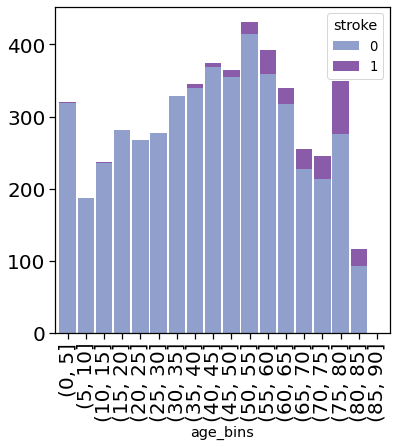

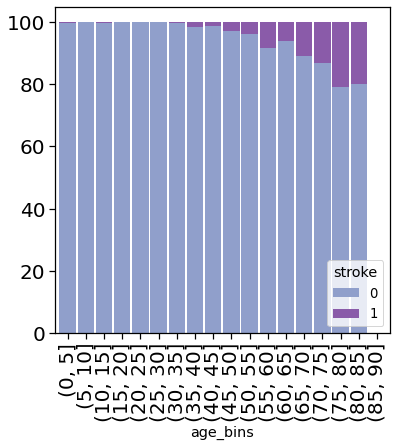

In [22]:
get_stacked_bar_chart('age_bins')
get_100_percent_stacked_bar_chart('age_bins', width = 0.9)

#### Observation
The plot shows that the chance of getting a stroke increases as the age increases, we can see that stroke patients happen after

### Binning by BMI

<AxesSubplot:xlabel='bmi_bins'>

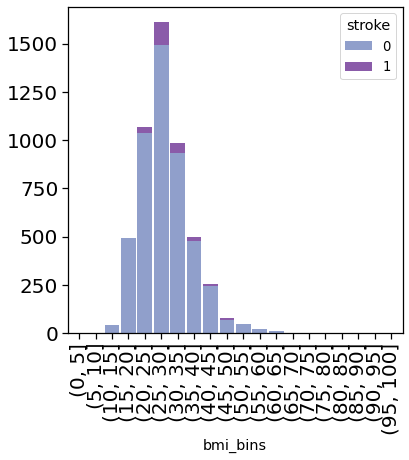

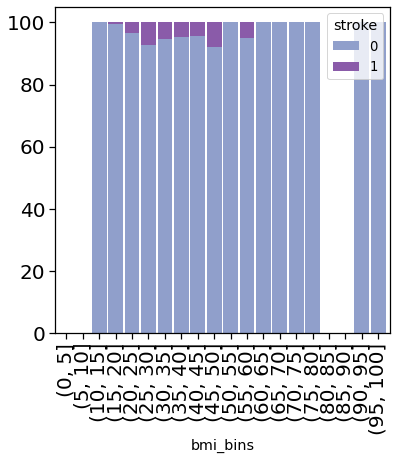

In [23]:
get_stacked_bar_chart('bmi_bins')
get_100_percent_stacked_bar_chart('bmi_bins', width = 0.9)

#### Observation
Since the data is imbalanced, we see that more occurances of stroke in the mid bmi range

### Binning by average glucose levels

<AxesSubplot:xlabel='avg_glucose_level_bins'>

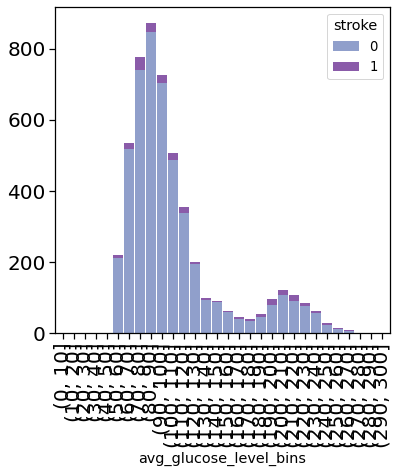

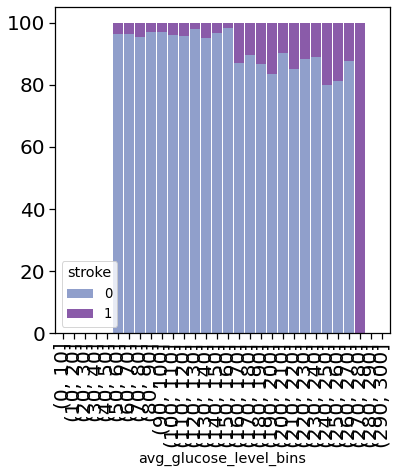

In [24]:
get_stacked_bar_chart('avg_glucose_level_bins')
get_100_percent_stacked_bar_chart('avg_glucose_level_bins', width = 0.9)

#### Observation
Data shows that all patients with highest avg_glucose_level suffer from strokes. Also to note that the stroke likelyhood increases as the glucose level increases

## Correlation between attributes
### Visualization of attributes correlation using heat map

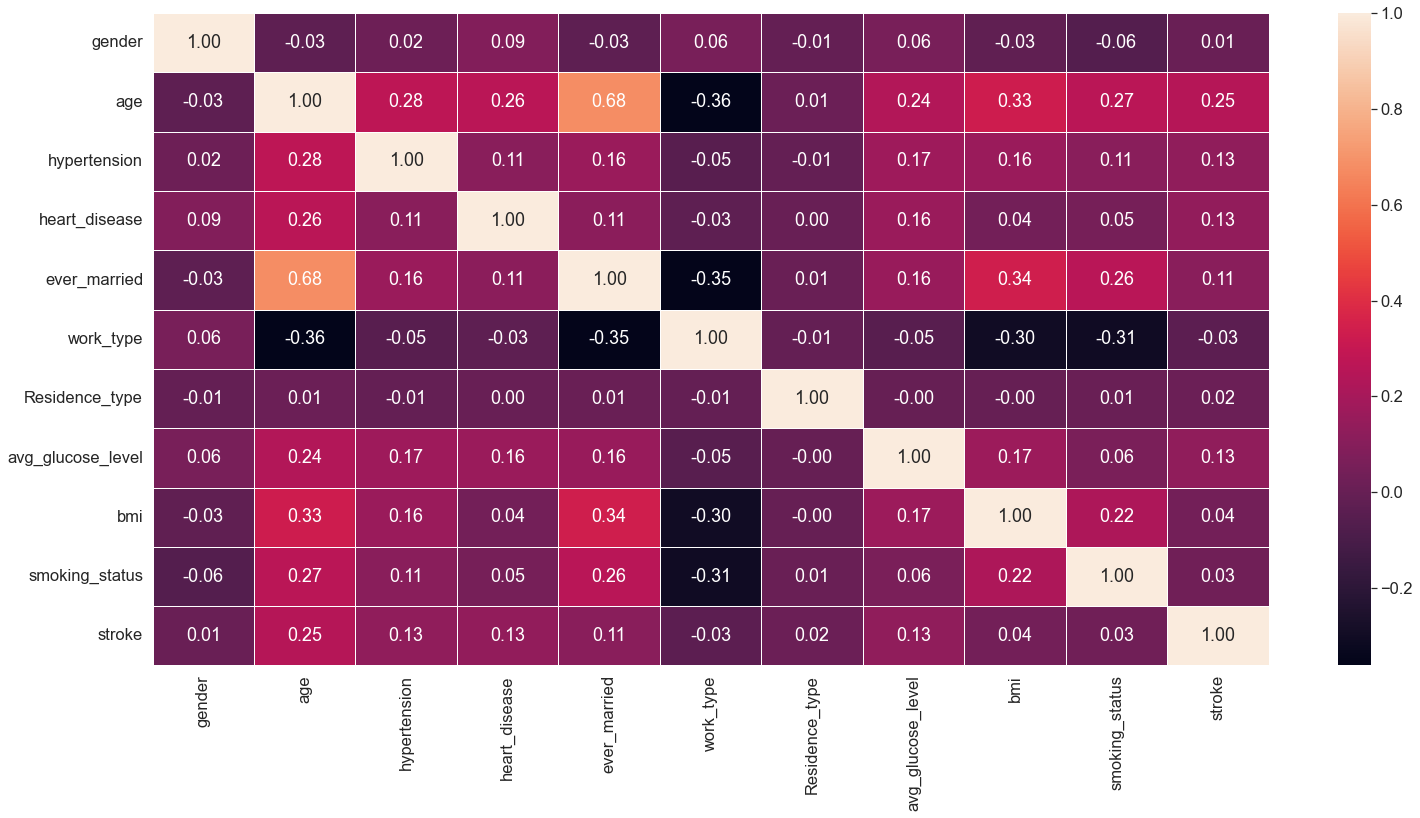

In [25]:
df=df.drop(['age_bins','bmi_bins', 'avg_glucose_level_bins'], axis=1)
plt.figure(figsize = (25,12))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), annot = True, fmt = ".2f", linewidths = .5)
plt.show()

**We observe that 'work-type' is the only attribute that is negaively coorealted with stroke and 'age' is highly correlated to stroke.**

### Pairwise plots to visualize numerical attributes distribution wrt stroke

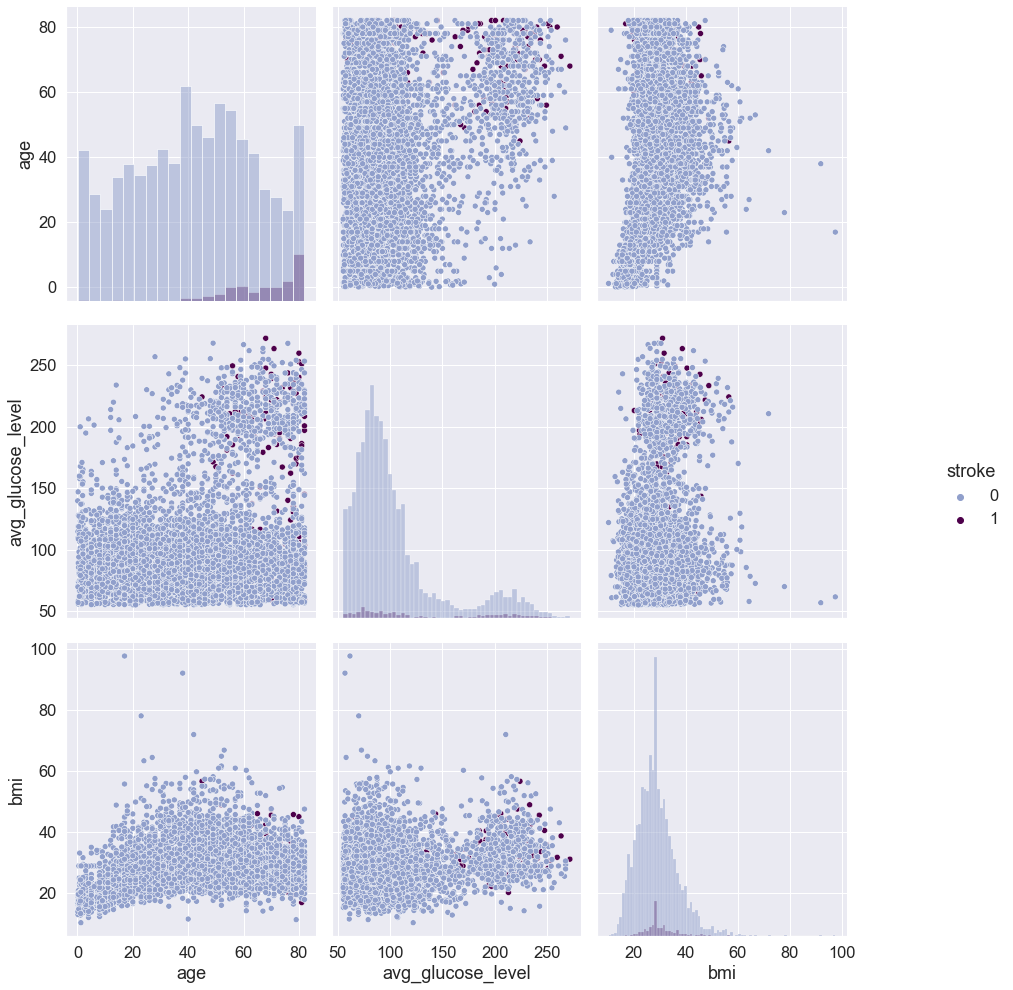

In [26]:
pair=sns.pairplot(df_num, hue = "stroke", diag_kind="hist", palette=["#909fcb", "#4d004b"])
pair.fig.set_size_inches(15,15)
plt.show(pair)

### Correlation of Numerical attributes with Target

In [27]:
corr_matrix=df[numerical_list].corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
avg_glucose_level    0.131945
bmi                  0.038935
Name: stroke, dtype: float64

<b>Among numerical attributes we see age has a higher correlation with chances of stroke . This indeed is meaningful.It is a known fact that aged people have higher chances of suffering from a stroke than younger people.</b>

### One-hot encoding categorical attributes

In [28]:
df_wo_target  = df.drop(['stroke'], axis = 1)
df_copy_oneHotEncoded=pd.get_dummies(df_wo_target, columns =category_list[:-1])
df_wo_target = df_copy_oneHotEncoded

## Data Transformation
Feature Scaling is one of the most important data transformation to be applied on data. Many models don't perform well when the numerical attributes have different scales.

Applying standard scaling to encoded attributes. We have implemented custom scaler function named: <b><i>fit_transform</i></b>

In [29]:
def fit_transform(df,col):
    df[col]=(df[col]-df[col].mean())/df[col].std()

### Applying standard scaling

In [30]:
cols = df_wo_target.columns
for i, column in enumerate(numerical_list):
    if(column =="stroke"):
        continue
    fit_transform(df_wo_target,column)   
df_wo_target

,age,avg_glucose_level,bmi,gender_0,gender_1,gender_2,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,1.051331,2.706111,1.001153,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,0.785993,2.121351,-0.000404,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,1.626231,-0.005028,0.468548,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0.255317,1.437217,0.715365,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1.582008,1.501038,-0.635632,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626231,-0.494609,-0.000404,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
5106,1.670454,0.420734,1.442825,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
5107,-0.363806,-0.511393,0.221731,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
5108,0.343763,1.328127,-0.427787,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [31]:
targetCol = df["stroke"]
df_scale_w_target = df_wo_target.join(targetCol)
df_scale_w_target.head()

,age,avg_glucose_level,bmi,gender_0,gender_1,gender_2,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3,stroke
0,1.051331,2.706111,1.001153,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1
1,0.785993,2.121351,-0.000404,1,0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
2,1.626231,-0.005028,0.468548,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
3,0.255317,1.437217,0.715365,1,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
4,1.582008,1.501038,-0.635632,1,0,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


---

# Classification using Gaussian Naive Bayes
We will use the preprocessed dataframe `df_scale_w_target` dataframe for our gaussian naive bayes implementation found in the `GaussianNaiveBayes.py` file.

## Splitting the dataframe to training and test data, fitting training data and predicting for test data

In [32]:
from GaussianNaiveBayes import GNB
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn import metrics

X = df_scale_w_target.drop(['stroke'], axis = 1)
Y = df_scale_w_target['stroke']

# Since the data is imbalanced, we have used stratified split for splitting into training and testing.
splitter=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=12) 

for train,test in splitter.split(X,Y):
    X_train = X.iloc[train]
    Y_train = Y.iloc[train]
    X_test = X.iloc[test]
    Y_test = Y.iloc[test]
print(Y_train.value_counts())  
print(Y_test.value_counts())

gnb = GNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

0    3645
1     187
Name: stroke, dtype: int64
0    1216
1      62
Name: stroke, dtype: int64


Using custom gaussian naive bayes
Accuracy :  92.80125195618153
Confusion Matrix:


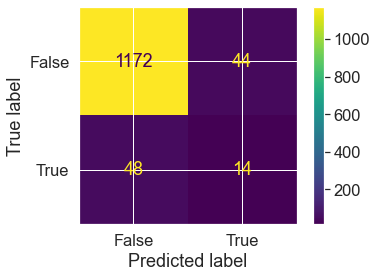

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1216
           1       0.24      0.23      0.23        62

    accuracy                           0.93      1278
   macro avg       0.60      0.59      0.60      1278
weighted avg       0.93      0.93      0.93      1278



(0.9257612631381532, 0.9280125195618153, 0.9268718312428852, None)

In [33]:
print("Using custom gaussian naive bayes")
print ("Accuracy : ", accuracy_score(Y_test.to_numpy(),Y_pred)*100)
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(Y_test.to_numpy(), Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(metrics.classification_report(Y_test,Y_pred))
precision_recall_fscore_support(Y_test, Y_pred, average='weighted')

**Using Custom Decision Tree classifier, we are obtaining accuracy of 92.80% and F-score of 0.93**

--- 

# Classification using Decision Tree Classifier

We will use label encoded data as our data set. In this data set, we have already taken care of null value in "bmi" column by replacing the null values with thier mean. 
The data set is split into training and test set with test set being 25% of original data set. 

In [34]:
stroke_data = df
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

X=stroke_data
Y=stroke_data['stroke']

# Since the data is imbalanced, we have used stratified split for splitting into training and testing.
splitter=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=12) 
for train,test in splitter.split(X,Y):     #this will splits the index
    X_train = X.iloc[train]
    Y_train = Y.iloc[train]
    X_test = X.iloc[test]
    Y_test = Y.iloc[test]
print(Y_train.value_counts())  
print(Y_test.value_counts())

0    3645
1     187
Name: stroke, dtype: int64
0    1216
1      62
Name: stroke, dtype: int64


### Using Custom Decision Tree Classifier

Here, we have used CART (Classification and Regression Trees) algorithm. 
CustomDecisionTree class models the decision tree. Below are the 3 main subclasses used to model different node types in this tree: 
1. Question: It is used to partition a dataset. This class just records a 'column number'and a 'column value'. The 'match' method is used to compare the feature value in an example to the feature value stored in the question.
2. Decision_Node: It asks a question. It holds reference to the question and to the two child nodes.
3. Leaf: It classifies data. It holds dictionary of class (e.g. "0" or "1" values of stroke) i.e. number of times the class appears in the rows from the training data that reach this leaf

Algorithm details: 
Tree creation: 
1. Tree is built recursively, starting from the root node. 
2. At each node, find the best question to ask or the best split by iterating over every feature / value and calculating the information gain based on gini index -> This creates "Question" node
3. Paritition the dataset at the node into true and false branch based on this best split -> This creates "Decision_Node"
4. If information gain at any node is 0 or we have reached the maximum depth, then create a leaf node

Prediction:
1. For each row in test data, traverse the tree starting from root and once you reach the leaf, return the value of target variable stored at leaf.

Client APIs to be used: 
1. build(): Takes training data set as input and uses it to build the tree
2. predict(): Takes test data set as input and uses it to predict the values for target variable
3. print_tree(): Print the tree in text format
4. We have also added handling for hyperparameter: max_depth

These implementations are available in DecisionTree.py


Initialize custom decision tree with maximum depth. Then build the tree using training data set. Then print the tree in text format and finally do predictions for test data using this custom decision tree

In [35]:
XY_train = X_train
XY_test = X_test
from DecisionTree import CustomDecisionTree
custom_decision_tree = CustomDecisionTree(max_depth=5)
custom_decision_tree.build(XY_train)
custom_decision_tree.print_tree()
Y_pred = custom_decision_tree.predict(XY_test)

Is age >= 68.0?
Gain = 0.006886445837295349
samples = 3832
value = {0.0: 3645, 1.0: 187}
--> True:
  Is ever_married >= 1.0?
  Gain = 0.0027969373917394943
  samples = 639
  value = {0.0: 524, 1.0: 115}
  --> True:
    Is avg_glucose_level >= 127.29?
    Gain = 0.0037439055123509313
    samples = 578
    value = {0.0: 481, 1.0: 97}
    --> True:
      Is avg_glucose_level >= 142.63?
      Gain = 0.015111797924297905
      samples = 192
      value = {0.0: 148, 1.0: 44}
      --> True:
        Is bmi >= 25.8?
        Gain = 0.007973441634517405
        samples = 182
        value = {0.0: 144, 1.0: 38}
        --> True:
          Is avg_glucose_level >= 252.72?
          Gain = 0.00897167731358467
          samples = 152
          value = {0.0: 116, 1.0: 36}
          --> True:
            value =  {1.0: 3, 0.0: 2}
          --> False:
            value =  {0.0: 114, 1.0: 33}
        --> False:
          Is smoking_status >= 3.0?
          Gain = 0.02682539682539685
          samples = 3

Measure accuracy for predictions done using custom decision tree. And compute confusion matrix for the same.

Using custom descision tree modelling
Accuracy :  94.36619718309859
Confusion Matrix:


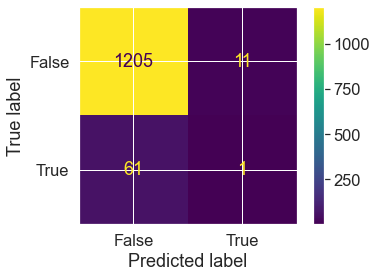

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1216
           1       0.08      0.02      0.03        62

    accuracy                           0.94      1278
   macro avg       0.52      0.50      0.50      1278
weighted avg       0.91      0.94      0.93      1278



(0.9096837475617265, 0.9436619718309859, 0.9251963202434768, None)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

print("Using custom descision tree modelling")
#Compute accuracy score using actual and predicted values of "stroke" in test set
print ("Accuracy : ", accuracy_score(Y_test,Y_pred)*100)
#Compute confusion matrix
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(metrics.classification_report(Y_test,Y_pred))
precision_recall_fscore_support(Y_test, Y_pred, average='weighted')

### Using Standard Decision Tree Classifier
We have used gini index as the best split computation criteria and max_depth. Training set is used to build the decision tree and test data set is used to predictions. We have also plotted the decision tree. 

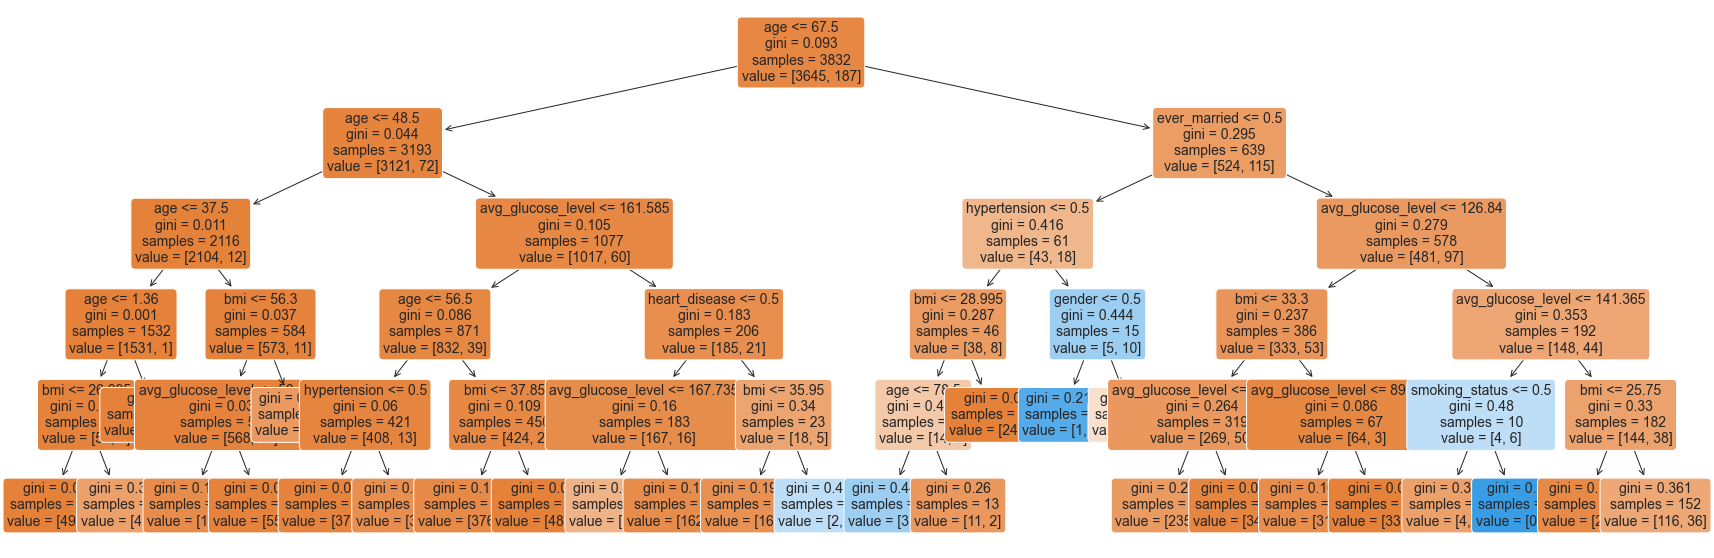

In [37]:
# Use standard decision tree classifier for modelling
from sklearn.tree import DecisionTreeClassifier
#For visualization
from sklearn import tree

# Drop 'stroke' column from X as it is target variable
X_train_wo_target=X_train.drop('stroke',axis=1)
# Drop 'stroke' column from X as it is target variable
X_test_wo_target=X_test.drop('stroke',axis=1)

tree_std = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
tree_std.fit(X_train_wo_target, Y_train)
plt.figure(figsize=(30,10), facecolor ='w')
#create the tree plot
a = tree.plot_tree(tree_std, feature_names = X_train_wo_target.columns, rounded = True, filled = True, fontsize=14) 
#show the plot
plt.show()

#Use test set for prediction
y_pred_std = tree_std.predict(X_test_wo_target)

Accuracy is measured for predictions done using standard decision tree. And confusion matrix is computed for the same

Using standard descision tree library
Accuracy :  94.60093896713614
Confusion Matrix:


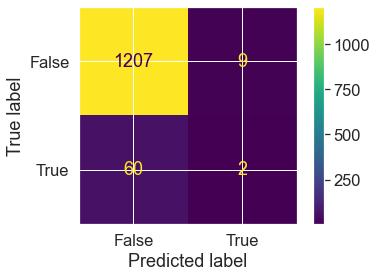

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1216
           1       0.08      0.02      0.03        62

    accuracy                           0.94      1278
   macro avg       0.52      0.50      0.50      1278
weighted avg       0.91      0.94      0.93      1278



(0.9096837475617265, 0.9436619718309859, 0.9251963202434768, None)

In [38]:
#Compute accuracy score using actual and predicted values of "stroke" in test set
print("Using standard descision tree library")
print ("Accuracy : ", accuracy_score(Y_test,y_pred_std)*100)

#Compute confusion matrix 
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred_std)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(metrics.classification_report(Y_test,Y_pred))
precision_recall_fscore_support(Y_test, Y_pred, average='weighted')

**Both custom Decision Tree classifier ans standard decision tree classifier using library are providing same F-score of 0.92**

---

# K-Means Clustering

k-means clustering is an unsupervised machine learning algorithm that seeks to segment a dataset into groups based on the similarity of datapoints. An unsupervised model has independent variables and no dependent variables.

The model designed for k-means is such that it uses the NumPy array to compute centroids which will be used to group the data. Hence, the scaled dataframe is converted to NumPy array using **to_numpy()** function. When a new data point is assigned to one of the groups, it can be done by finding the midpoint of each group (centroid) and selecting the nearest centroid as the group of the unassigned data point.

In [39]:
train = df_wo_target.to_numpy()
print(type(train))

<class 'numpy.ndarray'>


### K-Means Clustering - Custom model

The implementation of Kmeans algorithm can be found in KMeansClustering.py file . It has algorithms related to distance computations and centroid . *This implementation starts with random centroid initialization.*

In [178]:
from KMeansClustering import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(train)

#### Predict data values based on training data
Predict method returns the centroid of each cluster and the classified label. It is then compared with the 'Y'- column (stroke) which is the actual class that the data record belongs to. 

In [179]:
class_centroids, classification_CustomModel_label = kmeans.predict(train)

In [180]:
correct_labels = sum(Y == classification_CustomModel_label)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))

Result: 4260 out of 5110 samples were correctly labeled.


#### Fit the data and Predict on sklearn KMeans model

In [181]:
from sklearn.cluster import KMeans
clt = KMeans(n_clusters=2)
model = clt.fit(train)
classification_sklearn = model.predict(train)
correct_labels_sklearn = sum(Y == classification_sklearn)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))

Result: 4260 out of 5110 samples were correctly labeled.


#### Plotting K-Means Clusters

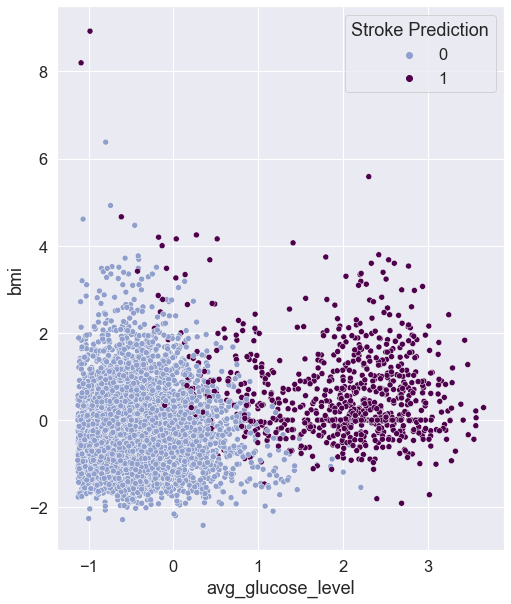

In [182]:
fig, ax = plt.subplots(figsize=(8, 10))
scatter=sns.scatterplot(df_wo_target.iloc[:, 1], df_wo_target.iloc[:, 2], 
                 hue=classification_CustomModel_label, palette=["#909fcb", "#4d004b"],ax=ax)
plt.legend(title='Stroke Prediction')
plt.show(scatter)

# Outlier Analysis

## Clustering based outlier detection using DBSCAN

Here we have considered 2 numerical attributes average glucose level and bmi to perform density based clustering using dbscan.During preprocessing and visualization we have observed a large number of outliers in these attributes .Hence it is appropriate to use these for our desnsity based clustering with an aim to detect those outliers 

The custom implementation for dbscan can be found in dbscan.py

In [183]:
X = df_scale_w_target[["avg_glucose_level","bmi"]]
Y = df_scale_w_target['stroke']

DBSCAN algorithm has 2 parameters - epsilon and minpts . while epsilon specifies the radius of neighborhood minpts denotes the density threshold in terms of number of points to consider in dense regions to classify as a core object .Here below we run our implementation of dbscan algorithm and verify against standard library available in sklearn to undertstand if there are any mismatched labels .

We start by scaling our input using a standard scaler which would normalize our parameters average_glucose_level and bmi with respect to 0 mean and 1 standard deviation. We apply scaling with a rationale to align our data point to a normal distribution whereby grouping it into clusters would be sensible.

We have used a radius of 0.3 and minPts 10 to our dbscan algorithm . When we apply the above parameters and run through our implementation we get labels associated with each data point .The data points labeled as -1 are considered as outliers and points labeled as 1 are inliers .

In [184]:
from sklearn.cluster import DBSCAN

from dbscan import dbscan 



X_arr = X.to_numpy()

print('Execeuting my custom dbscan implementation...')
my_labels = dbscan(X_arr, eps=0.3, MinPts=10)

print('Executing  scikit-learn dbscan implementation...')
db = DBSCAN(eps=0.3, min_samples=10).fit(X_arr)
skl_labels = db.labels_

for i in range(0, len(skl_labels)):
    if not skl_labels[i] == -1:
        skl_labels[i] += 1

label_mismatch = 0

for i in range(0, len(skl_labels)):
    if not skl_labels[i] == my_labels[i]:
        print('Scikit learn:', skl_labels[i], 'mine:', my_labels[i])
        label_mismatch += 1

if label_mismatch == 0:
    print('PASS - All labels match!')
else:
    print('FAIL -', label_mismatch, 'labels don\'t match.' )       

Execeuting my custom dbscan implementation...
Executing  scikit-learn dbscan implementation...
PASS - All labels match!


As we can observe there are 68 data points which have been labled as outlier based on attributes average glucose level and bmi. we further show the attribute values that are listed as outliers from the given data with an anamoly score as -1.

In [185]:
X["my_anomaly_score"] = my_labels
X["scikit_anomaly_score"] = skl_labels
anamolies = X[X.my_anomaly_score == -1]
anamolies

,avg_glucose_level,bmi,my_anomaly_score,scikit_anomaly_score
21,2.807693,2.598966,-1,-1
66,2.549100,2.417101,-1,-1
113,2.604749,3.599224,-1,-1
135,3.470847,1.273950,-1,-1
193,3.656787,0.286683,-1,-1
...,...,...,...,...
4475,2.538058,3.677166,-1,-1
4838,0.034722,4.157809,-1,-1
4952,2.333790,3.599224,-1,-1
4983,3.565363,0.208741,-1,-1


We now draw a scatterplot to understand the distribution of data points in terms of density . We observe that our dbscan was able to label points with sparse neighborhood as outliers. This labeling is dependent on the epsilon and minPts we specified while executing the algorithm. 

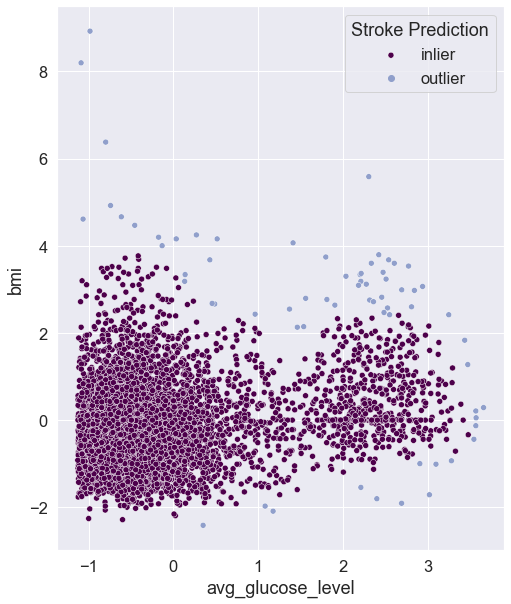

In [186]:
fig, ax = plt.subplots(figsize=(8, 10))
 
scatter=sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], 
                 hue=my_labels, palette=["#909fcb", "#4d004b"],ax=ax)
plt.legend(title='Stroke Prediction',  labels=['inlier', 'outlier'])
plt.show(scatter)

## Outlier detection using LOF (Local Outlier Factor)

<b>Local outlier factor (LOF) algorithm is good for outlier detection. It compares the density of instances around a given instance to the density around its neighbors. An anomaly is often more isolated than its k nearest neighbors.</b>

Local outlier factor (LOF) is an algorithm used for Unsupervised outlier detection. It produces an anomaly score ,which we name as lof score here that represents data points which are outliers in the data set. It does this by measuring the local density deviation of a given data point with respect to the data points near it. 

Here we have used our custom implementation of LOF . The method outliers executes our algorithm. We have passed 2 parameters to this method, the first one is k denotes k-distances which are distances between points that are calculated for each point to determine their k-nearest neighbors. Using these distances we calculate local reachability densities of each of the points which we term as lrd.

The calculation of Local outlier factor (LOF) is done by taking the ratio of the average of the lrds of k number of neighbors of a point and the lrd of that point. The local outlier factor is the lof score which we look at to finally decide on whether a point is an outlier .We have used a threshold of 1.5 . Hence any point having LOF > 1.5 will be labeled as outlier.

The custom implementation for LOF can be found on lof.py

In [187]:
from lof import LOF,outliers
X=df_scale_w_target[["avg_glucose_level","bmi","age"]]
X_array=X.to_records(index=False)
instances=X_array.tolist()[:100]
out = outliers(3,instances)

<b>The above implementation demonstrates LOF calculation and scores for first 100 data points .Here we have identified 5 outliers as per LOF score. </b>

In [188]:
out_df=pd.DataFrame(out)
out_df.sort_values(by='index')

,lof,instance,index
0,1.788318,"(2.3602897506482425, -1.129265968918209, 0.741...",44
2,1.708929,"(-1.0340988417872035, 0.5594804394376117, 1.71...",56
3,1.559133,"(0.2297152180988194, 0.2866829427032099, 1.007...",72
1,1.759587,"(0.8233081226897037, 2.209255776831374, -0.010...",79
4,1.541292,"(2.9688991424088362, 0.32565401366526686, 0.65...",97


#### Now we run Local outlier factor algorithm provided by sklearn 

In [189]:
from numpy import where
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
y_pred = lof.fit_predict(X_arr)
outlier = df[y_pred == -1]
lofs_index = where(y_pred==-1)
values = X_arr[lofs_index]
outlier

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,0,52.0,1,0,1,3,1,233.29,48.9,2,1
28,1,69.0,0,1,1,3,1,195.23,28.3,3,1
34,1,48.0,0,0,0,0,1,84.20,29.7,2,1
44,1,60.0,1,0,1,0,1,213.03,20.2,3,1
90,0,79.0,0,1,1,2,1,226.98,29.8,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5053,0,46.0,0,0,1,0,1,55.84,27.8,2,0
5068,1,80.0,0,0,1,3,1,120.03,24.3,1,0
5076,0,34.0,0,0,1,2,0,174.37,23.0,2,0
5086,0,51.0,0,0,1,2,1,152.56,21.8,0,0


Here we draw a scatterplot to show the datapoints corresponding to average_glucose_level and bmi . we plot a radius proportional to the outlier scores, showing the density around the point.

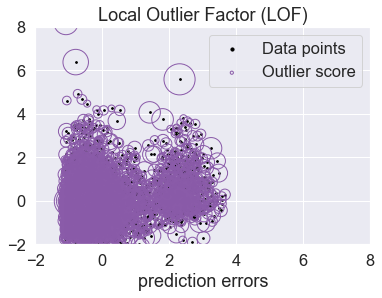

In [190]:
X_scores = lof.negative_outlier_factor_
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color="black", s=3.0, label="Data points")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    s=1000 * radius,
    edgecolors="#8a5ba9",
    facecolors="none",
    label="Outlier score",
)
plt.axis("tight")
plt.xlim((-2, 8))
plt.ylim((-2, 8))
plt.xlabel("prediction errors")
legend = plt.legend(loc="upper right")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [10]
plt.show()

## Outlier Analysis using Box Plot
We draw a box plot to see if there are outliers in the data , this analysis will help us during outlier detection.

<AxesSubplot:>

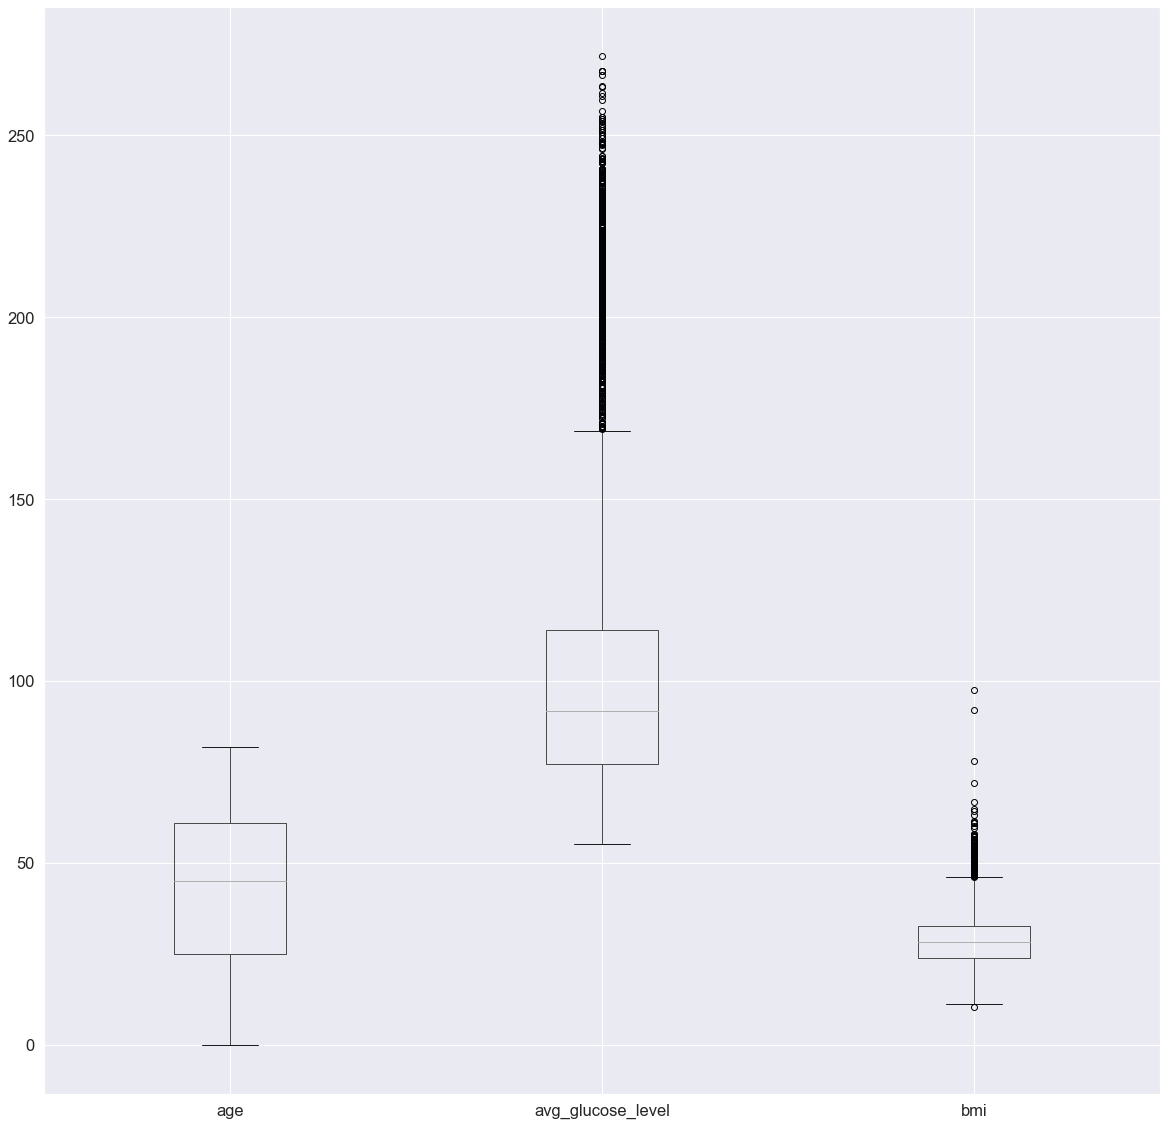

In [191]:
df[numerical_list[:-1]].boxplot(figsize=(20,20))

<b>As per the above box plots, we observe a lot of outliers in form of dense dots in avg_glucose_level and bmi attributes</b>

## Statistics based outlier detection

### Detection of univariate outliers using mean and standard deviation 

For this outlier detection method, the mean and standard deviation of the residuals are calculated and compared. If a value is a certain number of standard deviations away from the mean, that data point is identified as an outlier. The specified number of standard deviations is called the threshold. we have considered 3 times standard deviation from mean as our outlier points . As we see below using this method we have successfully ientified 249 data points as outliers .

In [192]:
df_2=df.copy()
for feature in numerical_list:  
    total =0
    data=df[feature]
    data_mean, data_std = data.mean(), data.std()
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers :%d'  % len(outliers))
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    total+=len(outliers)
    print('Non-outlier observations: %d' % len(outliers_removed))
print('total outliers identified: %d' % total)

Identified outliers :0
Non-outlier observations: 5110
Identified outliers :49
Non-outlier observations: 5061
Identified outliers :59
Non-outlier observations: 5051
Identified outliers :249
Non-outlier observations: 4861
total outliers identified: 249


### Inter Quartile range

IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.Here in the below implementation we have found a total of 627 outliers based on average_glucose_level , bmi and age . 

In [193]:
old_shape = df.shape[0]
df_1=df.copy()
for feature in numerical_list:    
    # IQR
    Q1 = df_1[feature].quantile(0.25)
    Q3 = df_1[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    upper = np.where(df.loc[:, feature] >= (Q3 + 1.5*IQR))
    lower = np.where(df.loc[:, feature] <= (Q1 - 1.5*IQR))
    try:
        df_1.drop(upper[0], inplace = True)
    except: print("Index not found in sample space".format(upper[0]))
    
    try:
        df_1.drop(lower[0], inplace = True)
    except:  
        print("Index not found in sample space".format(lower[0]))
        
df_1 = df_1.reset_index()
new_shape = df_1.shape[0]
print("Number of outliers removed: ",old_shape-new_shape)

Index not found in sample space
Index not found in sample space
Index not found in sample space
Number of outliers removed:  627


---

# Submission summary
This assignment shows the data preprocessing, visualization and analysis done on the [stroke prediction dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). The following summarizes all the steps taken:
 
- Identifying null values in dataset and imputing them with appropriate values
- Seggregating attributes to categorical and numeric
- Checking statistics univariate analysis, and bivariate analysis vs target on categorical attributes
- Checking statistics univariate analysis, and bivariate analysis vs target on numeric attributes
- Attribute correlation analysis
- Created custom implementation for the following algorithms for data analysis:
    - Gaussian Naive Bayes
    - Decision Tree
    - K Means
- Oulier analysis is done with the following methods:
    - Custom implemented DBSCAN
    - Boxplot analysis
    - LOF method
    - Statistical methods

---

This submission can be found in this [Github repo](https://github.com/Akhilsudh/BITS-Assignment/tree/master/Semester%203/Data%20Mining)